In [4]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from keras import layers
from keras.models import Sequential

In [5]:
validation_split = 0.2
epochs = 10
batch_size = 32
img_height = 180
img_width = 180

In [7]:
training_data = keras.utils.image_dataset_from_directory(
    directory='flowers/',
    validation_split= validation_split,
    subset='training',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 15740 files belonging to 16 classes.
Using 12592 files for training.


In [8]:
validation_data = keras.utils.image_dataset_from_directory(
    directory='flowers/',
    validation_split= validation_split,
    subset='validation',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 15740 files belonging to 16 classes.
Using 3148 files for validation.


In [9]:
class_names = training_data.class_names
print(class_names)

['astilbe', 'bellflower', 'black_eyed_susan', 'calendula', 'california_poppy', 'carnation', 'common_daisy', 'coreopsis', 'daffodil', 'dandelion', 'iris', 'magnolia', 'rose', 'sunflower', 'tulip', 'water_lily']


2024-08-09 09:18:02.716792: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [12592]
	 [[{{node Placeholder/_4}}]]
2024-08-09 09:18:02.717463: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [12592]
	 [[{{node Placeholder/_4}}]]


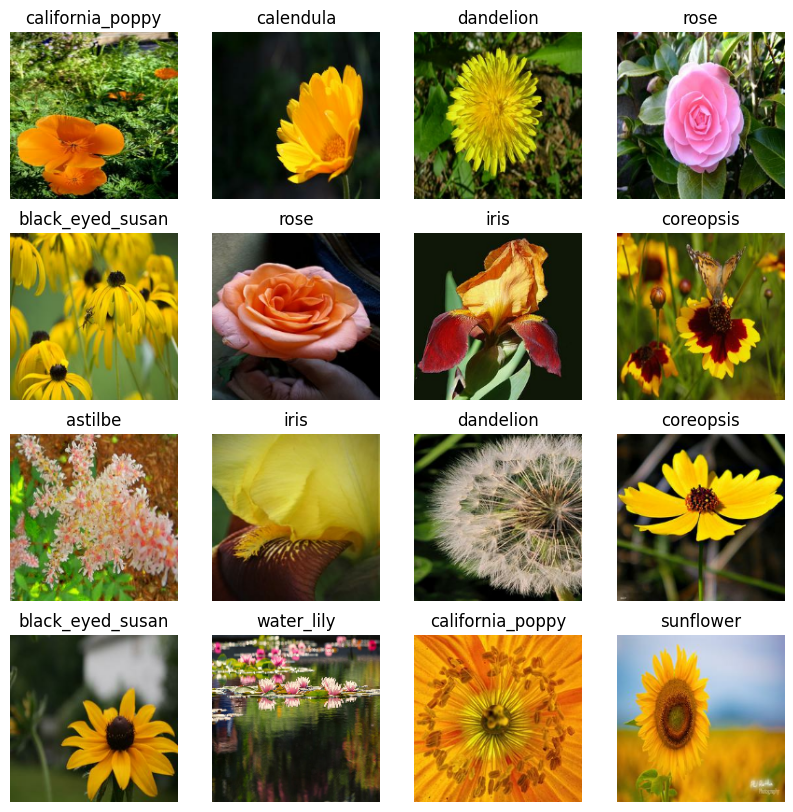

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in training_data.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
plt.show()

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = training_data.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = validation_data.cache().prefetch(buffer_size=AUTOTUNE)

In [16]:
num_classes = len(class_names)

model_1 = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model_1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 45, 45, 64)       

In [17]:
clf_1 = model_1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10


2024-08-09 09:34:08.337136: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [12592]
	 [[{{node Placeholder/_0}}]]
2024-08-09 09:34:08.337721: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [12592]
	 [[{{node Placeholder/_4}}]]


394/394 [==============================] - ETA: 0s - loss: 1.8124 - accuracy: 0.3902

2024-08-09 09:34:40.599981: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [3148]
	 [[{{node Placeholder/_0}}]]
2024-08-09 09:34:40.600344: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [3148]
	 [[{{node Placeholder/_0}}]]


394/394 [==============================] - 35s 82ms/step - loss: 1.8124 - accuracy: 0.3902 - val_loss: 1.5240 - val_accuracy: 0.4848
Epoch 2/10
394/394 [==============================] - 32s 82ms/step - loss: 1.2816 - accuracy: 0.5695 - val_loss: 1.3088 - val_accuracy: 0.5588
Epoch 3/10
394/394 [==============================] - 32s 82ms/step - loss: 0.9130 - accuracy: 0.6975 - val_loss: 1.2925 - val_accuracy: 0.5835
Epoch 4/10
394/394 [==============================] - 32s 82ms/step - loss: 0.5823 - accuracy: 0.8051 - val_loss: 1.2983 - val_accuracy: 0.6099
Epoch 5/10
394/394 [==============================] - 32s 81ms/step - loss: 0.3297 - accuracy: 0.8899 - val_loss: 1.5586 - val_accuracy: 0.5982
Epoch 6/10
394/394 [==============================] - 32s 82ms/step - loss: 0.1968 - accuracy: 0.9375 - val_loss: 1.7129 - val_accuracy: 0.6045
Epoch 7/10
394/394 [==============================] - 32s 82ms/step - loss: 0.1204 - accuracy: 0.9617 - val_loss: 2.1082 - val_accuracy: 0.5928
Epo

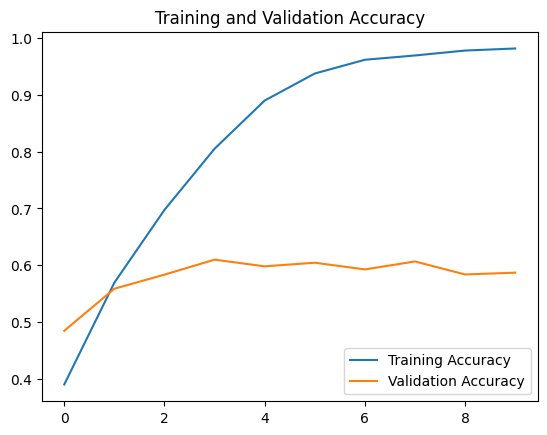

In [27]:
clf1_training = clf_1.history['accuracy']
clf1_validation = clf_1.history['val_accuracy']


plt.plot(range(10), clf1_training, label='Training Accuracy')
plt.plot(range(10), clf1_validation, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()


In [20]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [21]:
model_2 = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])
model_2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                 

In [36]:
augmented_clf = model_2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10


394/394 [==============================] - 37s 95ms/step - loss: 0.7373 - accuracy: 0.7519 - val_loss: 0.9447 - val_accuracy: 0.7008
Epoch 2/10
394/394 [==============================] - 37s 95ms/step - loss: 0.7184 - accuracy: 0.7610 - val_loss: 0.9074 - val_accuracy: 0.7201
Epoch 3/10
394/394 [==============================] - 37s 95ms/step - loss: 0.6816 - accuracy: 0.7693 - val_loss: 0.8462 - val_accuracy: 0.7389
Epoch 4/10
394/394 [==============================] - 37s 95ms/step - loss: 0.6643 - accuracy: 0.7803 - val_loss: 0.8467 - val_accuracy: 0.7402
Epoch 5/10
394/394 [==============================] - 37s 95ms/step - loss: 0.6336 - accuracy: 0.7838 - val_loss: 0.8343 - val_accuracy: 0.7411
Epoch 6/10
394/394 [==============================] - 37s 95ms/step - loss: 0.6105 - accuracy: 0.7946 - val_loss: 0.8690 - val_accuracy: 0.7481
Epoch 7/10
394/394 [==============================] - 37s 94ms/step - loss: 0.5938 - accuracy: 0.7995 - val_loss: 0.8281 - val_accuracy: 0.7449
Epo

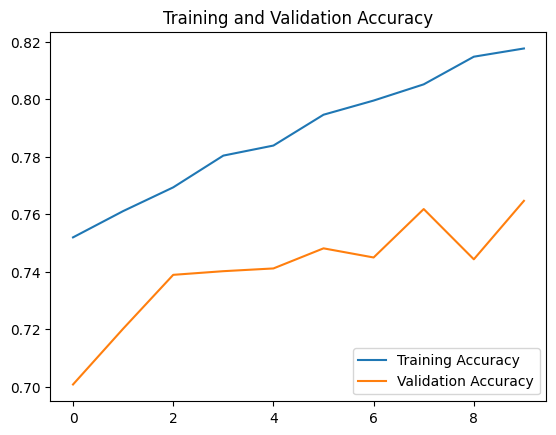

In [39]:
augmented_training = augmented_clf.history['accuracy']
augmented_validation = augmented_clf.history['val_accuracy']

plt.plot(range(10), augmented_training, label='Training Accuracy')
plt.plot(range(10), augmented_validation, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

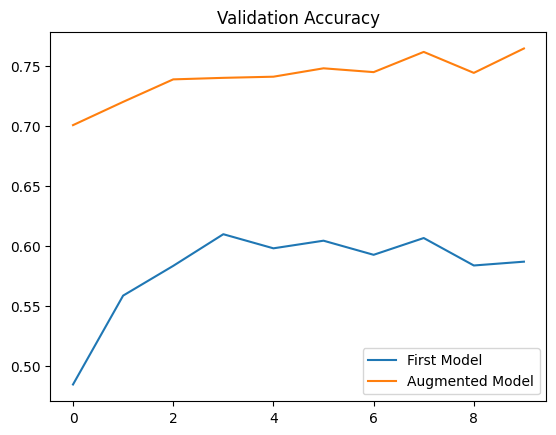

In [40]:
plt.plot(range(10), clf1_validation, label='First Model')
plt.plot(range(10), augmented_validation, label='Augmented Model')
plt.legend(loc='lower right')
plt.title('Validation Accuracy')
plt.show()

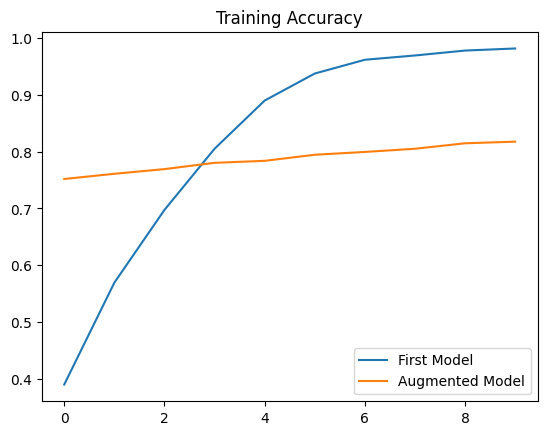

In [41]:
plt.plot(range(10), clf1_training, label='First Model')
plt.plot(range(10), augmented_training, label='Augmented Model')
plt.legend(loc='lower right')
plt.title('Training Accuracy')
plt.show()

In [38]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model_2.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 20ms/step
This image most likely belongs to calendula with a 98.32 percent confidence.
